# Autoenergias de uma Partícula em um Poço de Potencial Infinito

* PET - Física UFRN
* Petiano: Tiago Pernambuco Toledo de Macêdo
* Data: 12 de Julho de 2023

O Poço de Potencial Infinito é um dos problemas mais simples da mecânica quântica, consistindo numa partícula efetivamente presa numa região do espaço por um potencial infinito nas fronteiras desse "poço".

O objetivo desse notebook é estudar computacionalmente esse sistema e mostrar como suas simetrias internas podem ajudar a encontrar soluções para a Equação de Schrödinger e assim determinar os autoestados de energia permitidos de uma partícula presa no poço.

## Introdução
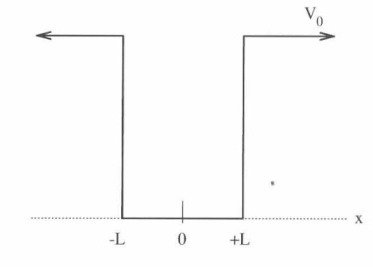 
Fonte da imagem: [1].

Imagine uma partícula confinada em uma região unidimensional com extremidades -L e L por uma barreira de potencial infinito em cada uma delas. Dentro dessa região, porém, o potencial é nulo, tornando a partícula livre para transitar entre as duas barreiras de potencial.
Nessas circunstâncias, a partícula tem um potencial dado por:

$$
  V(x) = \cases{        0       & $-L\lt x\lt L$ \cr
                        \infty       & $x \le -L \:ou\: x\ge L$ }
$$

Como em decorrência do potencial sabemos que a partícula não pode ser encontrada em qualquer lugar senão dentro do poço, podemos limitar nossa atenção ao comportamento da sua função de onda dentro dele. Na mecânica quântica a função de onda representa uma "amplitude de probabilidade", o que basicamente significa que o seu módulo ao quadrado representa a probabilidade de uma partícula se encontrar no estado descrito pela função de onda:

$$ P(x) = |\Psi(x)|^2 $$

Temos para o caso do Poço de Potencial Infinito que as funções de onda possíveis são soluções da Equação de Schrödinger Independente do tempo:

$$ -\frac{\hbar^2}{2m}\frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E\Psi(x)$$ 

Onde $\hbar = \frac{h}{2\pi}$ é a constante de Planck reduzida, $m$ é a mass da partícula, $V(x)$ é o potencial ao qual ela está sujeita e $E$ é a energia total da partícula.
Como no espaço que nos interessa $V(x) = 0$, a equação se reduz para:

$$ -\frac{\hbar^2}{2m}\frac{d^2\Psi(x)}{dx^2} = E\Psi(x)$$

E tem soluções na forma

$$\Psi(x) = ASin(kx) + BCos(kx)$$

Onde $k = \sqrt{\frac{2mE}{\hbar^2}}$. Definimos anteriormente, porém, que nas regiões onde o potencial é infinito a probabilidade de se encontrar a partícula é nula, ou seja, $\Psi(-L) = \Psi(L) = 0$. Aplicando essas condições de contorno chegamos às equações:

$$\Psi(L) = ASin(kL) + BCos(kL) = 0$$

$$\Psi(-L) = ASin(-kL) + BCos(-kL) = -ASin(kL) + BCos(kL) = 0$$

Somando as duas equações obtemos:

$$2BCos(kL) = 0$$

Que admite soluções de duas formas.

* Caso 1: $B = 0$, logo, para que haja solução não trivial, $A \neq 0$, o que força $k = \frac{n\pi}{L}$.
* Caso 2: $A = 0$, logo, $k = \frac{(2n-1)\pi}{2L}$

Onde para ambos os casos n = 1, 2, 3...

É possível mostrar analiticamente que para o Caso 1, as autoenergias correspondentes a essas funções de onda são $E = \frac{\hbar^2}{2mL^2}(n\pi)^2$ enquanto para o Caso 2 as autoenergias são $E = \frac{\hbar^2}{8mL^2}((2n-1)\pi)^2$. Essas equações serão úteis mais tarde para checar a precisão dos nossos cálculos.

Mais importante, os resultados do Caso 1 e do Caso 2 tem uma consequência bem importante: a função de onda de uma partícula num poço de potencial infinito sempre tem paridade bem definida! No Caso 1 temos que $\Psi(x) = ASin(kx)$, que é uma função ímpar, enquanto no Caso 2 temos que $\Psi(x) = BCos(kx)$, uma função par. Como no caso ímpar $\Psi(-x) = -\Psi(x)$ e no caso par $\Psi(-x) = \Psi(x)$, só precisamos avaliar a função de onda em metade da região interna do poço, o que simplifica a complexidade do nosso problema e permite que o computador o solucione mais rapidamente.


## Desenvolvimento do Código

Primeiro vamos importar as bibliotecas a serem utilizadas pelo resto do notebook. A extensão version_information mostra as especificações das bibliotecas e do sistema utilizados no desenvolvimento do código. Caso não a tenha instalada, basta executar o comando "pip install version_information" no prompt de comando do seu computador.

In [229]:
import matplotlib.pyplot as plt
import numpy as np

In [230]:
%load_ext version_information
%version_information Matplotlib, Numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.9.16 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.12.0
OS Windows 10 10.0.19045 SP0
Matplotlib 3.5.1
Numpy 1.25.0
Wed Jul 12 22:56:17 2023 Hora Padrão de Buenos Aires

A seguir, inicializaremos algumas variáveis importantes para o andamento do programa.

Primeiramente, para simplificar o trabalho, utilizaremos unidades tais que $\hbar = m = 1$  e o poço está localizado na região $-1 \lt x' \lt 1$. Ao fim dos cálculos, podemos voltar ao Sistema Internacional realizando as substituições $x = Lx'$ e $E = \frac{\hbar^2}{mL^2}E'$, onde x' e E' representam a posição e a energia nas unidades adimensionais. Nessas condições, a Equação de Schrödinger se reduz para:

$$ -\frac{1}{2}\frac{d^2\Psi(x')}{dx'^2} + V(x')\Psi(x') = E'\Psi(x')$$

Como não podemos trabalhar com um potencial verdadeiramente infinito, utilizaremos um potencial $V_0$ muito grande comparado às outras grandezas do sistema, de forma que o mesmo se comporte como se as barreiras realmente fossem infinitas. 

$$V(x) = \cases{        0       & $-1\lt x'\lt 1$ \cr
                        V_0       & $x' \le -1 \:ou\: x'\ge 1$ }$$

In [231]:
L = 1 # Distância das extremidades do poço ao seu centro em unidades adimensionais.
V0 = 1e9 # Aproximação do potencial infinito.
N = 10000 # Número de pontos na discretização do espaço dentro do poço.
h = L/N # Distância entre dois pontos consecutivos dentro do poço.

In [232]:
def V(x):
    if x <= -L:
        return V0
    elif x >= L:
        return V0
    else:
        return 0

Agora que nosso problema está devidamente modelado, precisamos encontrar uma forma de solucioná-lo. Da equação de Schrödinger, a única quantidade que conhecemos é o potencial. Precisamos encontrar alguma forma de aproximar $\frac{d^2\Psi(x')}{dx'^2}$ e encontrar $\Psi$ e $E'$.

Para $\frac{d^2\Psi(x')}{dx'^2}$, podemos realizar as expansões de $\Psi(x')$ em Série de Taylor:

$$ \Psi(x' + h) = \Psi(x') + h\frac{d\Psi(x')}{dx'} + \frac{h^2}{2}\frac{d^2\Psi(x')}{dx'^2} + \frac{h^3}{6}\frac{d^3\Psi(x')}{dx'^3} + ... $$

$$ \Psi(x' - h) = \Psi(x') - h\frac{d\Psi(x')}{dx'} + \frac{h^2}{2}\frac{d^2\Psi(x')}{dx'^2} - \frac{h^3}{6}\frac{d^3\Psi(x')}{dx'^3} + ... $$

Onde $\Psi(x' + h)$ é o valor da função de onda um pequeno passo h à frente de um ponto qualquer x' e $\Psi(x' - h)$ é o valor da função h atrás do mesmo ponto. Somando as duas séries e desprezando os termos de ordem maior temos:

$$ \Psi(x' + h) + \Psi(x' - h) = 2\Psi(x') + h^2\frac{d^2\Psi(x')}{dx'^2} $$

E finalmente:

$$ \frac{d^2\Psi(x')}{dx'^2} = \frac{\Psi(x' + h) - 2\Psi(x') + \Psi(x' - h)}{h^2} $$

Com isso, a Equação de Schrödinger se torna

$$ -\frac{1}{2}\frac{\Psi(x' + h) - 2\Psi(x') + \Psi(x' - h)}{h^2}  + V(x')\Psi(x') = E'\Psi(x')$$

E, com um pouco de álgebra:

$$ \Psi(x' + h) = 2\Psi(x') - \Psi(x' - h) -h^2[E'-V(x')]\Psi(x') $$

Ou seja, dado que saibamos o valor da função de onda em dois consecutivos, podemos calculá-la para todo o poço! Mas ainda temos um problema: Não sabemos o valor de $E'$. Por enquanto, vamos chutar um valor para $E'$ para depois decidir como continuar.

In [233]:
xvec = np.linspace(0, L, N) # Valores de x' na metade direita do poço.
xvec2 = np.linspace(-L, L, 2*N) # Valores de x' pelo poço todo.
par = 1 # Paridade da solução desejada. Aqui usaremos 1 para soluções pares e -1 para soluções ímpares.
PsiE = [] # Vetor para guardar os valores da Função de Onda
E = 1 # Chute inicial para a energia.

Para inicializar nosso cálculo, precismos de 2 valores de $\Psi(x')$. Usemos a paridade das soluções!

Para soluções pares, temos que $\Psi(x')$ é um cosseno, logo, $\Psi(0) = 1$. Para o segundo ponto, temos que, como h é muito pequeno, $\Psi(h) = 1$ ainda deve ser uma boa aproximação.

Para soluções ímpares, temos que $\Psi(x')$ é um seno, logo, $\Psi(0) = 0$. Para $\Psi(h)$, como h é muito próximo de 0, podemos usar o fato de que $\lim\limits_{x \to 0} \frac{Sin(x)}{x} = 1$ para aproximar $\Psi(h) = h$. 

Agora que temos nosso ponto de partida, vamos calcular uma função de onda!

In [234]:
i = 2 # Começamos a contar em 2 pois já temos os primeiros valores da função de onda.

if par == 1: # Para soluções pares.
    psivec = [1, 1]
    while i < N:
        psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
        i += 1
    PsiE = np.array(psivec[::-1],float)
    PsiE = np.append(PsiE, psivec)    

if par == -1: # Para soluções ímpares.
    psivec = [0, h]
    while i < N:
        psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
        i += 1
    PsiE = np.array(psivec[::-1], float)
    PsiE = -1*PsiE
    PsiE = np.append(PsiE, psivec)

Notem que, no caso par caluclamos os valores de $\Psi(x')$ de 0 até L e tornamos os valores de -L até 0 tais que $\Psi(-x') = \Psi(x')$, enquanto no caso ímpar fizemos com que $\Psi(-x') = -\Psi(x')$.

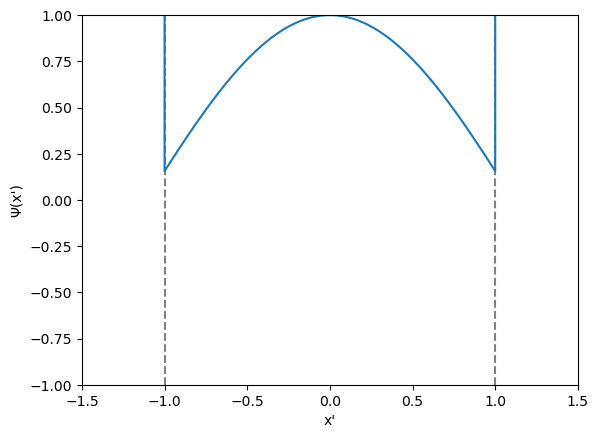

In [235]:
plt.ylim([-1, 1])
plt.xlim([-L*1.5, L*1.5])
plt.axvline(x = -L, color = 'gray', linestyle = '--')
plt.axvline(x = L, color = 'gray', linestyle = '--')
plt.xlabel("x'")
plt.ylabel("Ψ(x')")
plt.plot(xvec2, PsiE)

E assim obtemos nosso primeiro gráfico da função de onda. Mas tem algo estranho: nossas condições de contorno indicavam que os valores de $\Psi(x')$ em $-L$ e $L$ deveria ser 0, mas estão claramente acima desse valor. Isso se dá pois realizamos o cálculo com um chute de energia diferente das Autoenergias permitidas ao sistema pelas propriedades da Mecânica Quântica.

Tentemos refazer os cálculos com outro valor inicial para a energia.

In [236]:
par = 1
PsiE = []
i = 2
E = 1.5 # Valor de E maior do que o primeiro!

In [237]:
if par == 1:
    psivec = [1, 1]
    while i < N:
        psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
        i += 1
    PsiE = np.array(psivec[::-1],float)
    PsiE = np.append(PsiE, psivec)    

if par == -1:
    psivec = [0, h]
    while i < N:
        psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
        i += 1
    PsiE = np.array(psivec[::-1], float)
    PsiE = -1*PsiE
    PsiE = np.append(PsiE, psivec)

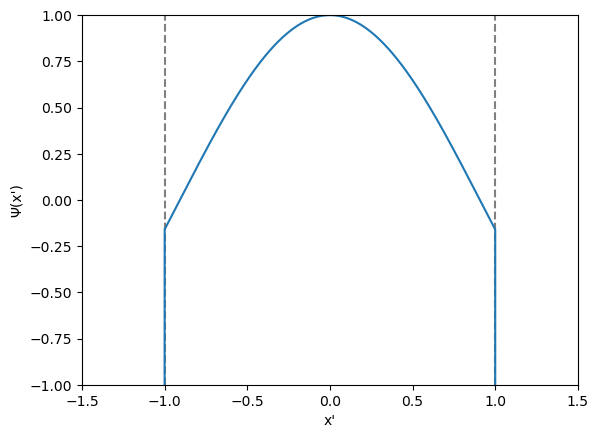

In [238]:
plt.ylim([-1, 1])
plt.xlim([-L*1.5, L*1.5])
plt.axvline(x = -L, color = 'gray', linestyle = '--')
plt.axvline(x = L, color = 'gray', linestyle = '--')
plt.xlabel("x'")
plt.ylabel("Ψ(x')")
plt.plot(xvec2, PsiE)

Notem que agor os valores de $\Psi(x)$ nas extremidades são menores do que 0. Isso nos dá uma informação importante: o incremento na energia foi grande demais. Isso indica que existe um valor para $E'$ entre $E' = 1$ e $E' = 1.5$ para o qual $\Psi(L) = \Psi(-L) = 0$. Como faremos para encontrá-lo? Usaremos o Método do Tiro! O procedimento é simples: calcularemos $\Psi(x')$ para todo o poço e checaremos seu valor na extremidade direita. Se $\Psi(L) > 0$, saberemos que o chute inicial de energia foi pequeno demais e refaremos o cálculo com um chute de energia $E + dE$ e verificaremos mais uma vez o valor de $\Psi(L)$. Se ainda estiver acima de 0, incrementaremos $E$ novamente, caso contrário, saberemos que o valor correto de $E$ está entre os dois últimos chutes, então estabeleceremos um $dE' = -\frac{dE}{2}$. Ou seja, inverteremos o sinal de $dE$ e diminuiremos seu módulo. Esse processo será repetido até uma precisão arbitrária tomada como aceitável.

In [239]:
# Utilizaremos a variável lastdiv para guardar a informação de se a última divergência da 
# Função de Onda em L foi para mais ou para menos.
if(psivec[int(N/xvec[-1])-1] < 0):
    lastdiv = -1 
else:
    lastdiv = 1

In [240]:
dE = 1
tol = 1e-6

lastdiv = 1

In [241]:
while(abs(dE) > tol):
    i = 2
    if par == 1:
        psivec = [1, 1]
        while i < N:
            psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
            i += 1
        PsiE = np.array(psivec[::-1],float)
        PsiE = np.append(PsiE, psivec)    
    
    if par == -1:
        psivec = [0, h]
        while i < N:
            psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
            i += 1
        PsiE = np.array(psivec[::-1], float)
        PsiE = -1*PsiE
        PsiE = np.append(PsiE, psivec)
    
    if psivec[int(N/xvec[-1])-1] < 0:
        div = -1
    else:
        div = 1
    
    if div*lastdiv > 0:
        E = E + dE
    elif div*lastdiv < 0:
        dE = -dE/2
        E = E + dE
        
    lastdiv = div

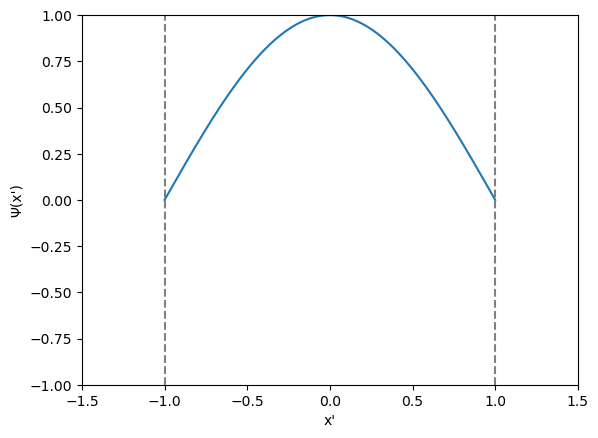

In [242]:
plt.ylim([-1, 1])
plt.xlim([-L*1.5, L*1.5])
plt.axvline(x = -L, color = 'gray', linestyle = '--')
plt.axvline(x = L, color = 'gray', linestyle = '--')
plt.xlabel("x'")
plt.ylabel("Ψ(x')")
plt.plot(xvec2, PsiE)

Dessa vez, $\Psi(x')$ nas extremidades é 0, o que quer dizer que encontramos o valor de uma Autoenergia do sistema! Mas ainda não acabamos.

Como foi mencionado anteriormente, o módulo ao quadrado da Função de Onda representa uma densidade de probabilidade. Isso quer dizer que, ao longo de toda a extensão do poço, a probabilidade total de se encontrar a partícula tem de ser 100%, ou seja, $\Psi(x')$ tem de satisfazer à seguinte condição:

$$ \ \int_{-L}^{L} |\Psi(x')|^2 dx' \ = 1 $$

## Normalização da Função de Onda

A condição apresentada acima se chama Condição de Normalização da Função de Onda e, felizmente, é um problema simples de se resolver. Para obter a função de onda correta, basta dividir os valores de $\Psi(x')$ pela raiz quadrada do resultado da integral acima, tal que, seja $A^2 = \ \int_{-L}^{L} |\Psi(x')|^2 dx' \$,

$$ \ \int_{-L}^{L} [\frac{|\Psi(x')|}{A}]^2 \,dx' \ = \frac{A^2}{A^2} = 1 $$

E como podemos fazer para calcular essa integral no computador? Vamo utilizar a Regra do Trapézio.

A regra do trapézio consiste em aproximar a área abaixo de uma curva arbitrária por vários trapézios, cada um com área $h(\frac{1}{2}f(x) + \frac{1}{2}f(x + h))$ tal que $\ \int_{x}^{x+h} f(x) dx \approx h(\frac{1}{2}f(x) + \frac{1}{2}f(x + h)) $. Repetindo esse procedimento para vários pontos ficamos com

$$\int_{x_1}^{x_N} f(x) dx \approx h[\frac{1}{2}f_1 + f_2 + f_3 + f_4 + ... + \frac{1}{2}f_N]$$

Onde $f_i$ é o valor da função no ponto $x_i$.

In [243]:
def Trap(r): # Definindo uma função para realizar o cálculo da integral pela Regra do Trapézio.
    soma = 0
    k = 1
    for i in range(len(r)):
        
        if i == 0 or i == len(r)-1:
            k = 1/2
        else:
            k = 1
        soma += k*(r[i])**2
    integral = soma*h
    return integral

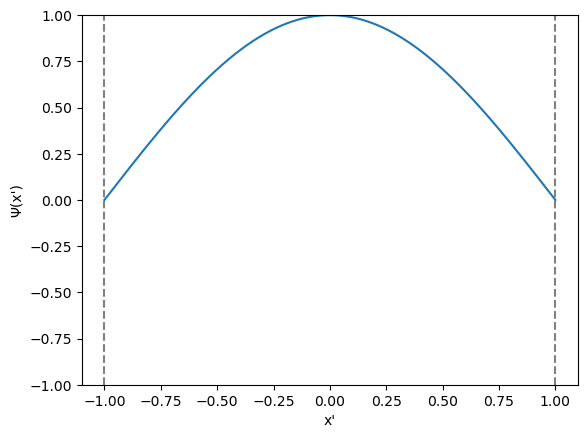

In [244]:
A2 = Trap(PsiE)
A = np.sqrt(A2)
PsiE = PsiE/A

plt.ylim([-1, 1])
plt.axvline(x = -L, color = 'gray', linestyle = '--')
plt.axvline(x = L, color = 'gray', linestyle = '--')
plt.xlabel("x'")
plt.ylabel("Ψ(x')")
plt.plot(xvec2, PsiE)

Agora, com a função de onda normalizada, finalmente obtivemos o gráfico correto!

## Resultados

Agora que desenvolvemos um programa para calcular os Autoestados de Energia de uma partícula num Poço de Potencial Infinito, podemos realizar algums testes e encontrar alguns dos diferentes estados permitidos pelas características do sistema.

Definiremos a função Psi_e_En que recebe como parâmetros um chute de energia e a paridade da solução desejada e plota o gráfico da Função de Onda junto com a informação da Autoenergia correspondente.

Para termos resultados mais palpáveis, retomaremos as unidades do SI utilizando as fórmulas apresentadas na introdução e utilizaremos um valor de L de $10^{-10} m$, também chamado de Ângstrom, um valor de comprimento próximo ao encontrado em sistemas atômicos reais e a massa real de um elétron.

In [250]:
def Psi_e_En(Chute_Energia, Paridade):
    xvec = np.linspace(0, L, N)
    xvec2 = np.linspace(-L, L, 2*N)
    par = Paridade
    PsiE = []
    i = 2
    E = Chute_Energia
    if par == 1:
        psivec = [1, 1]
        while i < N:
            psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
            i += 1
        PsiE = np.array(psivec[::-1],float)
        PsiE = np.append(PsiE, psivec)    

    if par == -1:
        psivec = [0, h]
        while i < N:
            psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
            i += 1
        PsiE = np.array(psivec[::-1], float)
        PsiE = -1*PsiE
        PsiE = np.append(PsiE, psivec)    
    if(psivec[int(N/xvec[-1])-1] < 0):
        lastdiv = -1
    else:
        lastdiv = 1
    dE = 1
    tol = 1e-6
    
    while(abs(dE) > tol):
        i = 2
        if par == 1:
            psivec = [1, 1]
            while i < N:
                psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
                i += 1
            PsiE = np.array(psivec[::-1],float)
            PsiE = np.append(PsiE, psivec)    

        if par == -1:
            psivec = [0, h]
            while i < N:
                psivec.append(2*psivec[i-1] - psivec[i-2] - 2*(h**2)*(E-V(xvec[i]))*psivec[i-1])
                i += 1
            PsiE = np.array(psivec[::-1], float)
            PsiE = -1*PsiE
            PsiE = np.append(PsiE, psivec)

        if psivec[int(N/xvec[-1])-1] < 0:
            div = -1
        else:
            div = 1

        if div*lastdiv > 0:
            E = E + dE
        elif div*lastdiv < 0:
            dE = -dE/2
            E = E + dE

        lastdiv = div
    A2 = Trap(PsiE)
    A = np.sqrt(A2)
    PsiE = PsiE/A
    
    hbar = 1.05457168e-34
    m = 9.109e-31
    L0 = 1e-10
    xvec2 = xvec2*L0
    plt.ylim([-1, 1])
    plt.axvline(x = -L0, color = 'gray', linestyle = '--')
    plt.axvline(x = L0, color = 'gray', linestyle = '--')
    plt.xlabel("x")
    plt.ylabel("Ψ(x)")
    plt.plot(xvec2, PsiE)
    
    E0 = hbar**2/(m*L0**2)*E
    print("A energia para esse autoestado é", E0, "J")

A energia para esse autoestado é 1.5069683434911276e-18 J


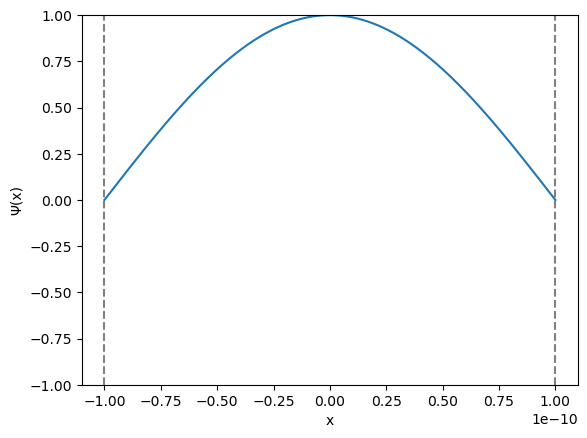

In [251]:
plt.figure(0)
Psi_e_En(1, 1)

A energia para esse autoestado é 6.0272737364125615e-18 J


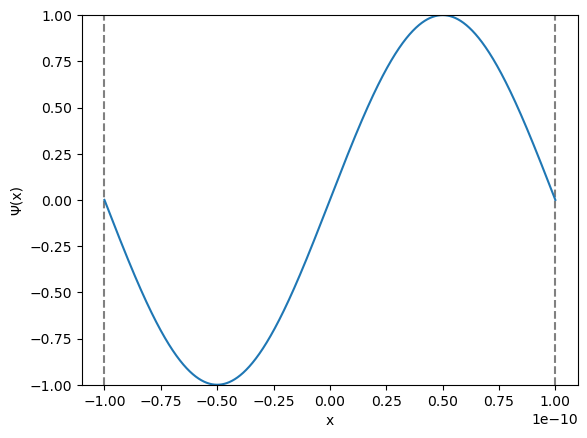

In [252]:
plt.figure(1)
Psi_e_En(1, -1)

A energia para esse autoestado é 1.3562719748799192e-17 J


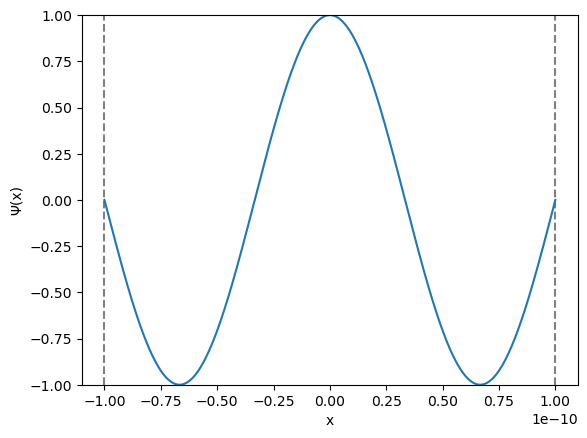

In [253]:
plt.figure(2)
Psi_e_En(8, 1)

A energia para esse autoestado é 2.410909145261596e-17 J


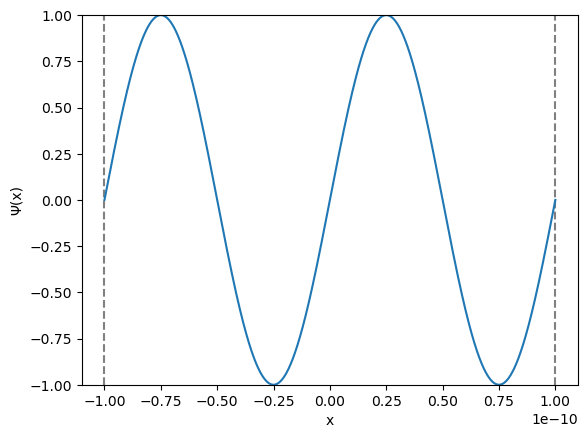

In [254]:
plt.figure(3)
Psi_e_En(12, -1)

## Conclusões

Neste notebook exploramos numericamente o problmema do Poço de Potencial Infinito, um típico problema de cursos de graduação em Mecânica Quântica e vimos como a simetria de um sistema físico pode ser aproveitada para simplificar um problema físico para um computador.

Com base nos resultados obtidos para as energias dos 4 autoestados plotados ao fim da última seção, podemos utilizar as fórmulas analíticas para a energia de cada um deles apresentadas na introdução para verificar que os métodos utilizados fornecem uma boa ferramenta para o cálculo de Autoenergias e Funções de onda.

|Paridade |n|Val. Num.|Val. An. | 
|---------|:--------:|:-------:|:---------:|
|Par      |1|1.5069 e-18|1.5062 e−18|
|Ímpar    |1|6.0272 e-18|6.0249 e−18|
|Par      |2|1.3562 e-17|1.3556 e−17|
|Ímpar    |2|2.4109 e-17|2.4099 e−17|

## Referências

* [1] Giordano, N. J. & Nakanishi, H. Computational physics. Pearson Prentice Hall (2006).
* [2] Eisberg, R. & Resnick, R. Quantum Physics of Atoms, Molecules, Solids, Nuclei and Particles. John Wiley & Sons (1985).